# Minneapolis College Library Springshare Data Analysis
# Homepage Views  
## William Vann
### 5/2023

In [1]:
# Import dependencies

from datetime import datetime as dt
from scipy import stats as st

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

In [2]:
homepage_df_alltime = pd.read_csv("homepage_alltime.csv")

In [3]:
homepage_df_alltime.head(25)

,Date,Views
0,2013-02,0
1,2013-03,0
2,2013-04,0
3,2013-05,0
4,2013-06,0
5,2013-07,0
6,2013-08,0
7,2013-09,0
8,2013-10,0
9,2013-11,0


In [4]:
homepage_df_alltime.tail(25)

,Date,Views
99,2021-05,9
100,2021-06,15
101,2021-07,57
102,2021-08,10
103,2021-09,28
104,2021-10,38
105,2021-11,11
106,2021-12,15
107,2022-01,30
108,2022-02,43


In [5]:
# Remove first and last rows with minimal data

homepage_df_alltime = homepage_df_alltime.loc[ ((homepage_df_alltime["Date"]>="2014-07") &
                                                (homepage_df_alltime["Date"]<="2023-04")), :]
homepage_df_alltime = homepage_df_alltime.reset_index(drop=True)

homepage_df_alltime

,Date,Views
0,2014-07,4
1,2014-08,21
2,2014-09,28
3,2014-10,15
4,2014-11,4
...,...,...
101,2022-12,16
102,2023-01,7
103,2023-02,5
104,2023-03,18


In [6]:
# Get basic info on this dataset

homepage_df_alltime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    106 non-null    object
 1   Views   106 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 1.8+ KB


In [7]:
# Checking for null values in Views column

homepage_df_alltime["Views"].isna().sum()

0

In [8]:
# Summary stats for Total column

homepage_df_alltime["Views"].describe()

count    106.00000
mean      17.54717
std       15.72752
min        0.00000
25%        8.00000
50%       13.00000
75%       21.00000
max       96.00000
Name: Views, dtype: float64

In [9]:
homepage_df_alltime["Date"] = pd.to_datetime(homepage_df_alltime["Date"])

In [10]:
homepage_df_alltime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    106 non-null    datetime64[ns]
 1   Views   106 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.8 KB


In [11]:
homepage_df_alltime

,Date,Views
0,2014-07-01,4
1,2014-08-01,21
2,2014-09-01,28
3,2014-10-01,15
4,2014-11-01,4
...,...,...
101,2022-12-01,16
102,2023-01-01,7
103,2023-02-01,5
104,2023-03-01,18


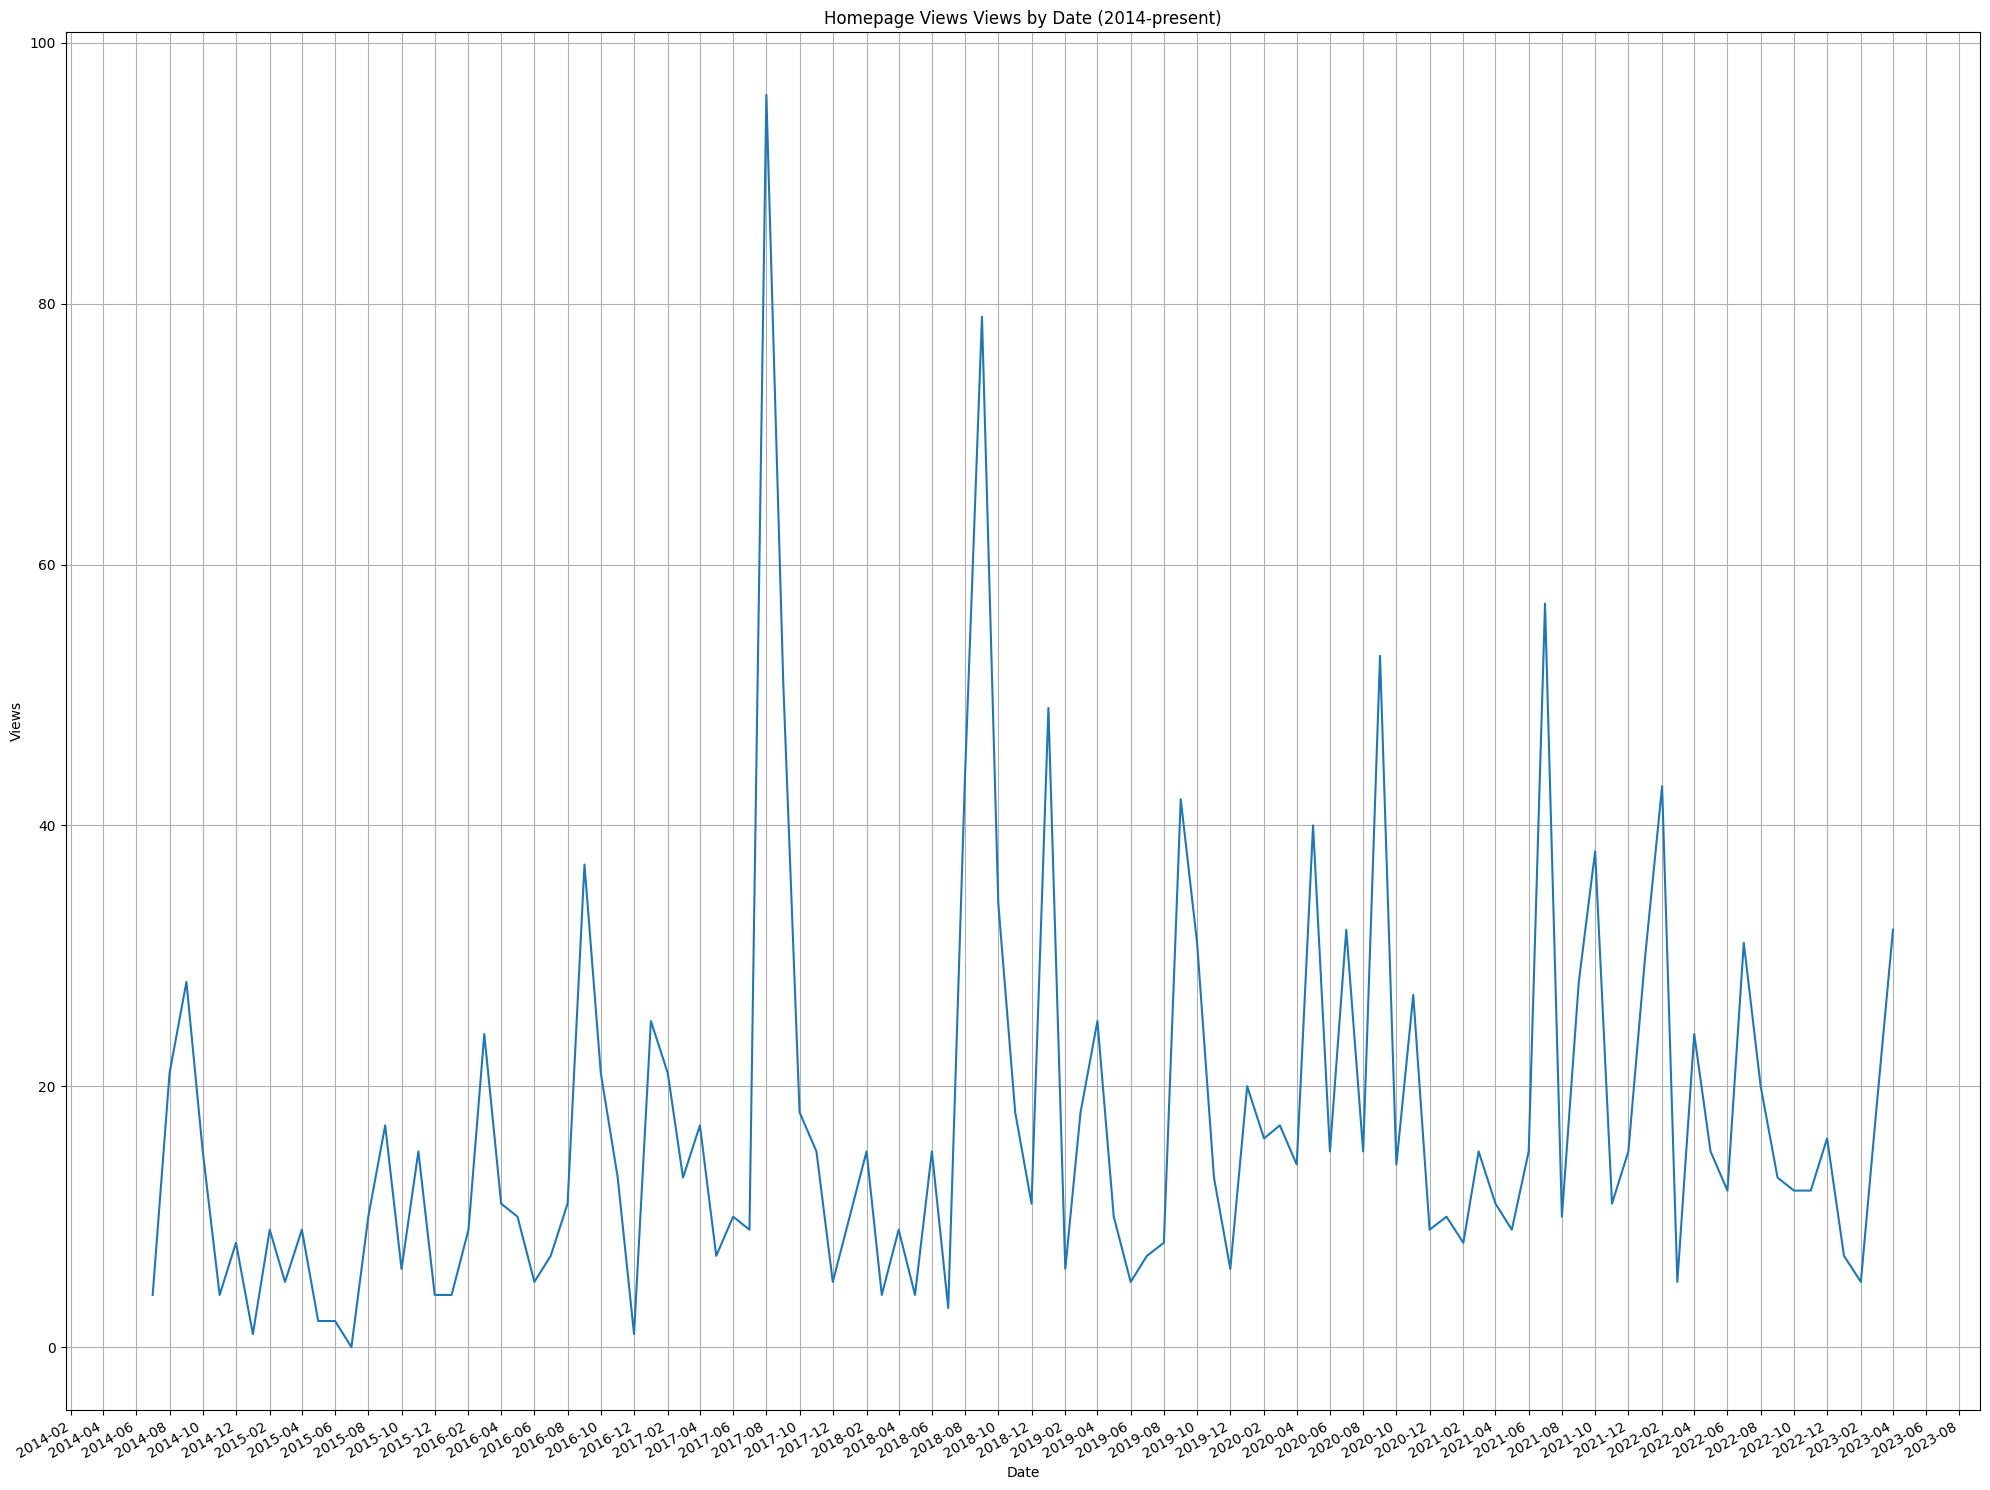

In [12]:
fig, ax = plt.subplots(figsize=(20, 15))

ax.set_title("Homepage Views Views by Date (2014-present)")
ax.grid(True)
ax.set_xlabel("Date")
ax.set_ylabel("Views")

month_locator = mdates.MonthLocator(interval=2)
year_month_formatter = mdates.DateFormatter("%Y-%m") # four digits for year, two for month

# Same as above
ax.xaxis.set_major_locator(month_locator)
ax.xaxis.set_major_formatter(year_month_formatter)
ax.plot(homepage_df_alltime["Date"], homepage_df_alltime["Views"])

fig.autofmt_xdate()
plt.tight_layout()

fig.savefig("Homepage/homepage.png")

# Analysis by Terms

In [13]:
homepage_summer_terms = homepage_df_alltime.loc[(homepage_df_alltime["Date"].dt.month == 5) | 
                                       (homepage_df_alltime["Date"].dt.month == 6) |
                                       (homepage_df_alltime["Date"].dt.month == 7), :]
homepage_summer_terms = homepage_summer_terms.reset_index(drop=True)

homepage_summer_terms["Formatted_Date"] = homepage_summer_terms["Date"].dt.strftime("%m-%Y")

homepage_summer_terms

,Date,Views,Formatted_Date
0,2014-07-01,4,07-2014
1,2015-05-01,2,05-2015
2,2015-06-01,2,06-2015
3,2015-07-01,0,07-2015
4,2016-05-01,10,05-2016
5,2016-06-01,5,06-2016
6,2016-07-01,7,07-2016
7,2017-05-01,7,05-2017
8,2017-06-01,10,06-2017
9,2017-07-01,9,07-2017


In [14]:
homepage_fall_terms = homepage_df_alltime.loc[(homepage_df_alltime["Date"].dt.month == 8) | 
                                       (homepage_df_alltime["Date"].dt.month == 9) |
                                       (homepage_df_alltime["Date"].dt.month == 10) |
                                       (homepage_df_alltime["Date"].dt.month == 11) |
                                       (homepage_df_alltime["Date"].dt.month == 12), :]
homepage_fall_terms = homepage_fall_terms.reset_index(drop=True)

homepage_fall_terms["Formatted_Date"] = homepage_fall_terms["Date"].dt.strftime("%m-%Y")

homepage_fall_terms

,Date,Views,Formatted_Date
0,2014-08-01,21,08-2014
1,2014-09-01,28,09-2014
2,2014-10-01,15,10-2014
3,2014-11-01,4,11-2014
4,2014-12-01,8,12-2014
5,2015-08-01,10,08-2015
6,2015-09-01,17,09-2015
7,2015-10-01,6,10-2015
8,2015-11-01,15,11-2015
9,2015-12-01,4,12-2015


In [15]:
homepage_spring_terms = homepage_df_alltime.loc[(homepage_df_alltime["Date"].dt.month == 1) | 
                                       (homepage_df_alltime["Date"].dt.month == 2) |
                                       (homepage_df_alltime["Date"].dt.month == 3) |
                                       (homepage_df_alltime["Date"].dt.month == 4), :]
homepage_spring_terms = homepage_spring_terms.reset_index(drop=True)

homepage_spring_terms["Formatted_Date"] = homepage_spring_terms["Date"].dt.strftime("%m-%Y")

homepage_spring_terms

,Date,Views,Formatted_Date
0,2015-01-01,1,01-2015
1,2015-02-01,9,02-2015
2,2015-03-01,5,03-2015
3,2015-04-01,9,04-2015
4,2016-01-01,4,01-2016
5,2016-02-01,9,02-2016
6,2016-03-01,24,03-2016
7,2016-04-01,11,04-2016
8,2017-01-01,25,01-2017
9,2017-02-01,21,02-2017


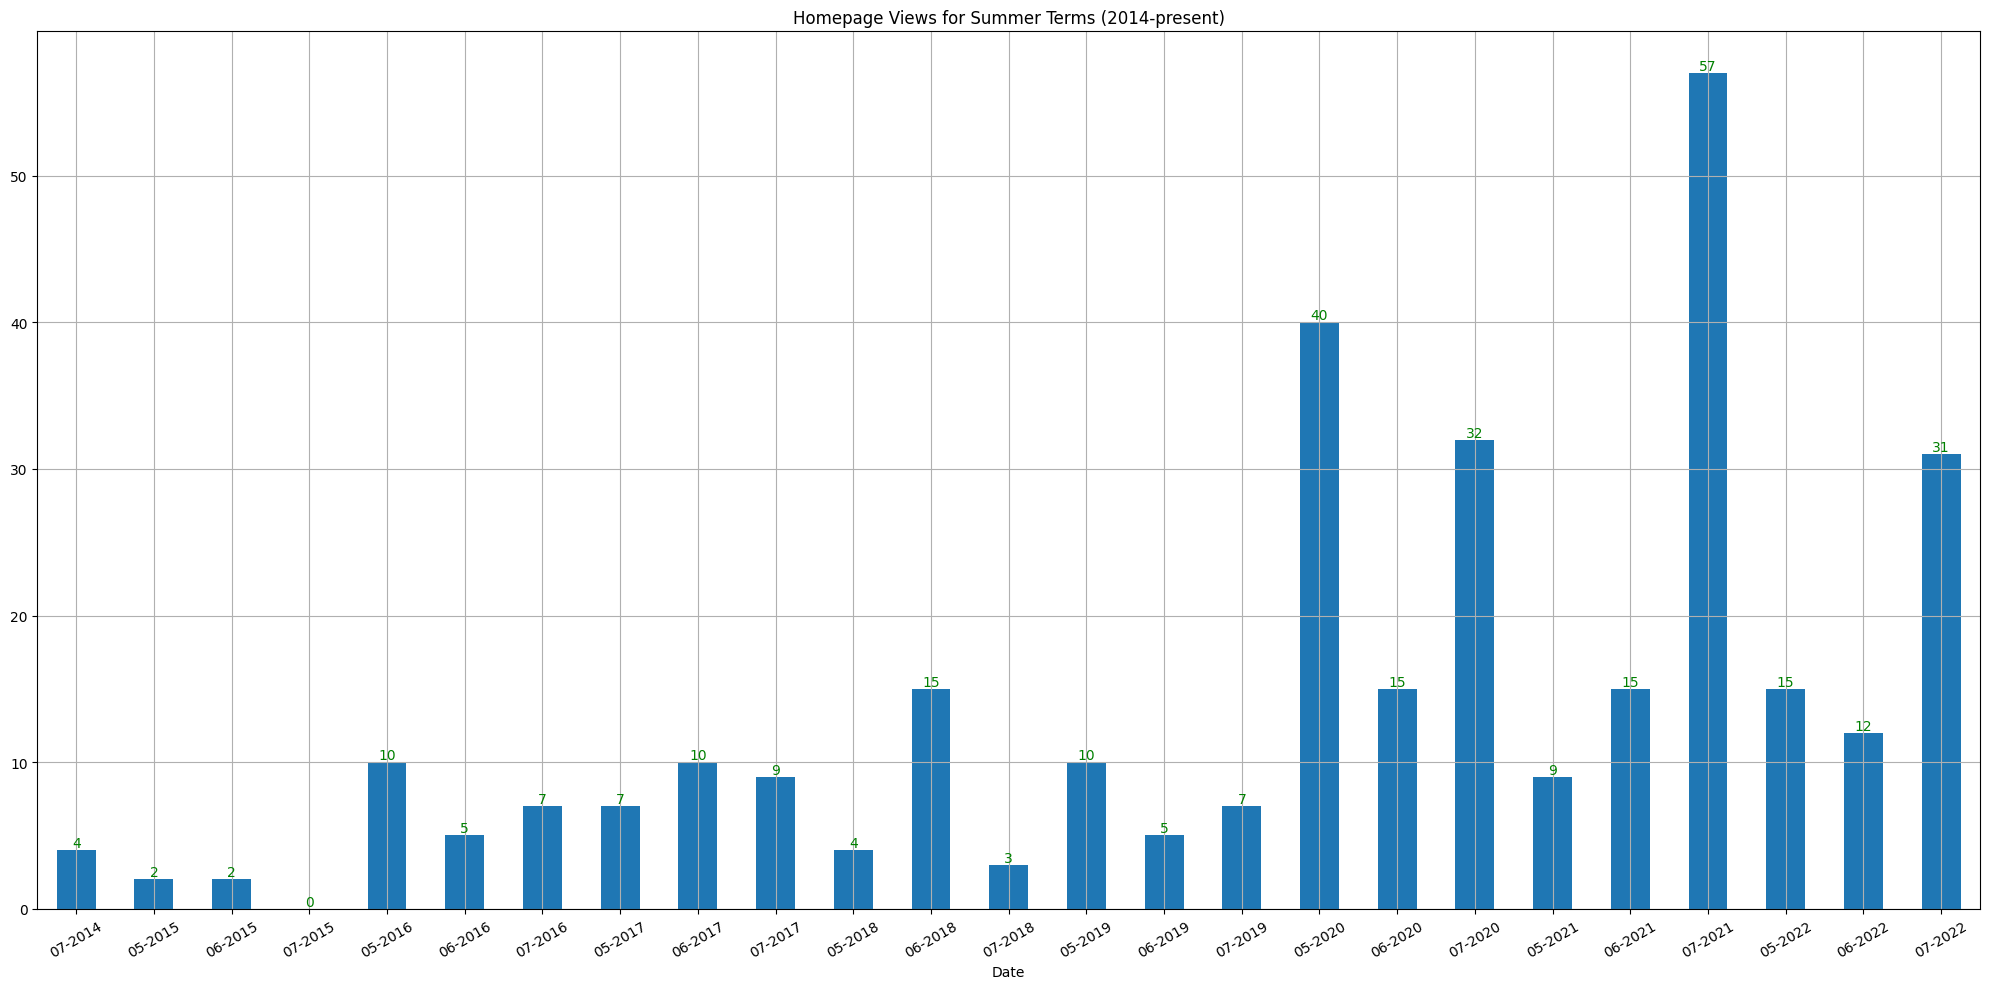

In [16]:
ax = homepage_summer_terms.plot(
        x="Formatted_Date", 
        y="Views", 
        figsize=(20,10),
        kind="bar", 
        legend=False,
        grid=True,
        rot=30,
        xlabel="Date",        
        title=f"Homepage Views for Summer Terms (2014-present)")

ax.bar_label(ax.containers[0], color="green")
plt.tight_layout()

plt.savefig("Homepage/homepage_summers.png")

plt.show()

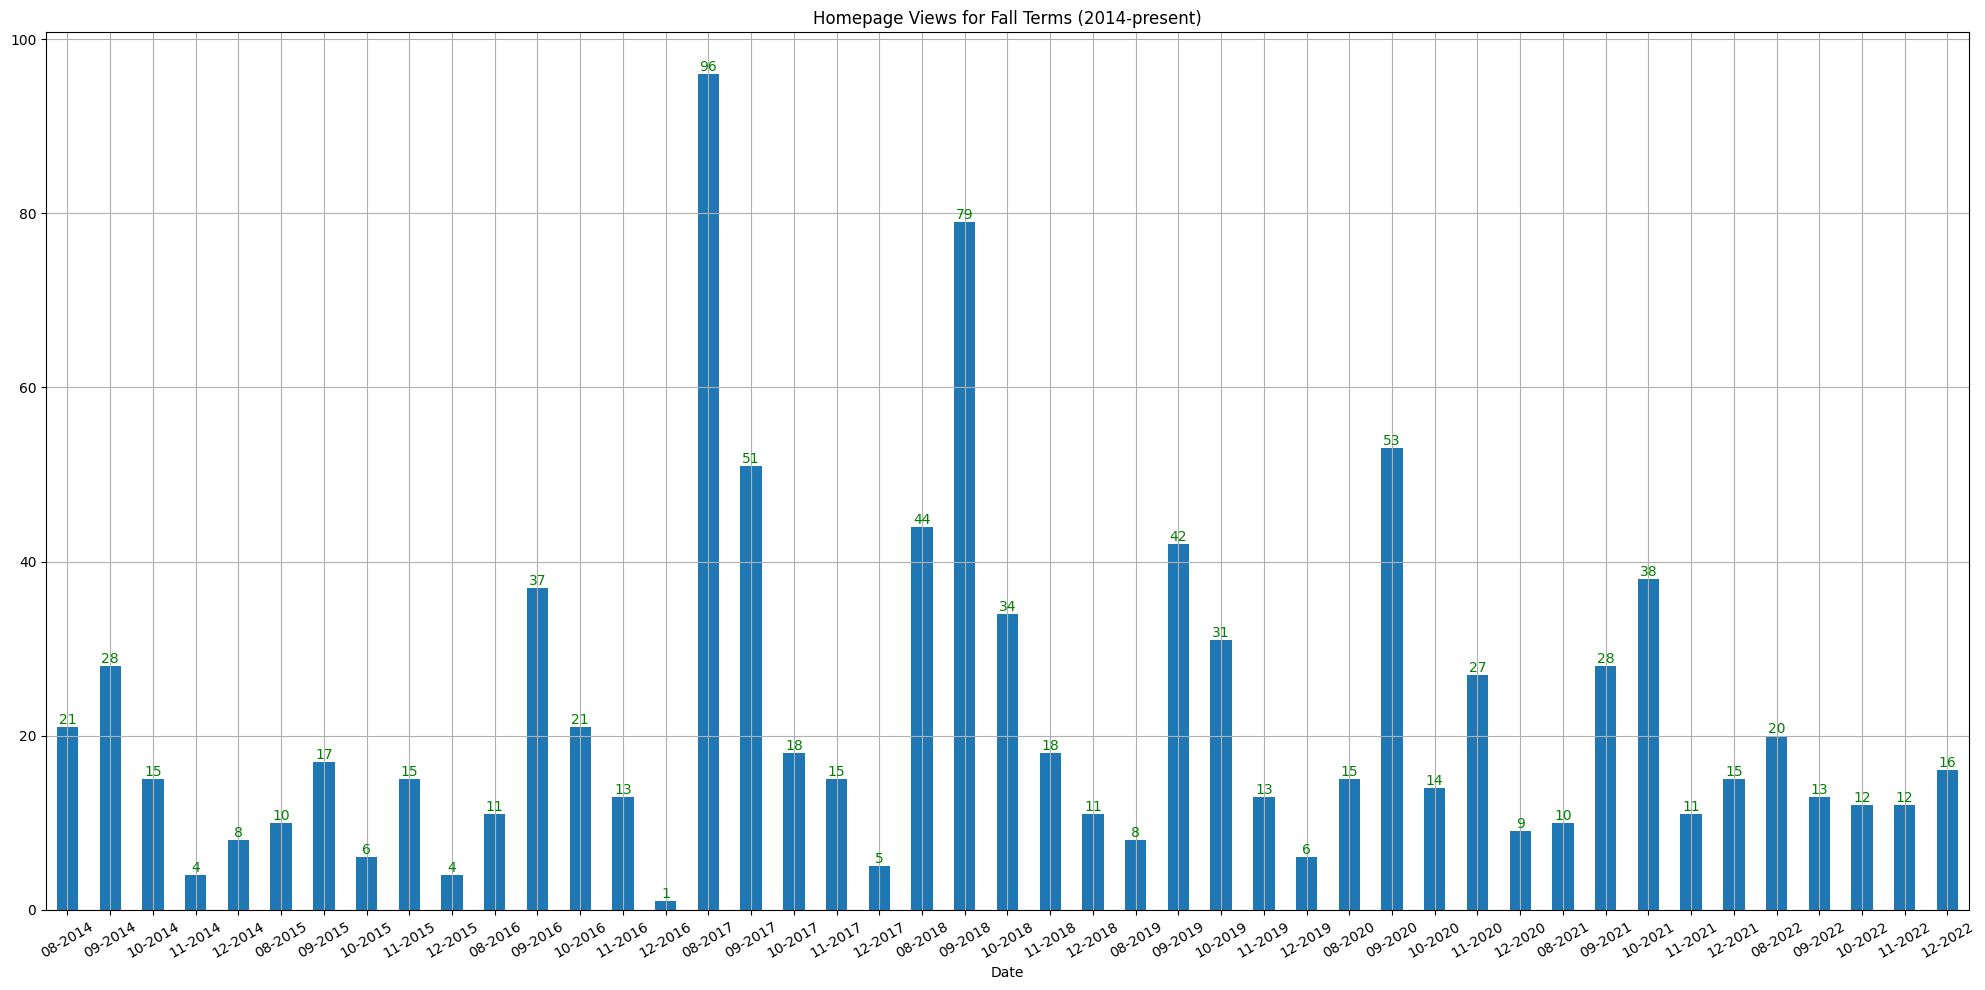

In [17]:
ax = homepage_fall_terms.plot(
        x="Formatted_Date", 
        y="Views", 
        figsize=(20,10),
        kind="bar", 
        legend=False,
        grid=True,
        rot=30,
        xlabel="Date",        
        title=f"Homepage Views for Fall Terms (2014-present)")

ax.bar_label(ax.containers[0], color="green")
plt.tight_layout()

plt.savefig("Homepage/homepage_fall.png")

plt.show()

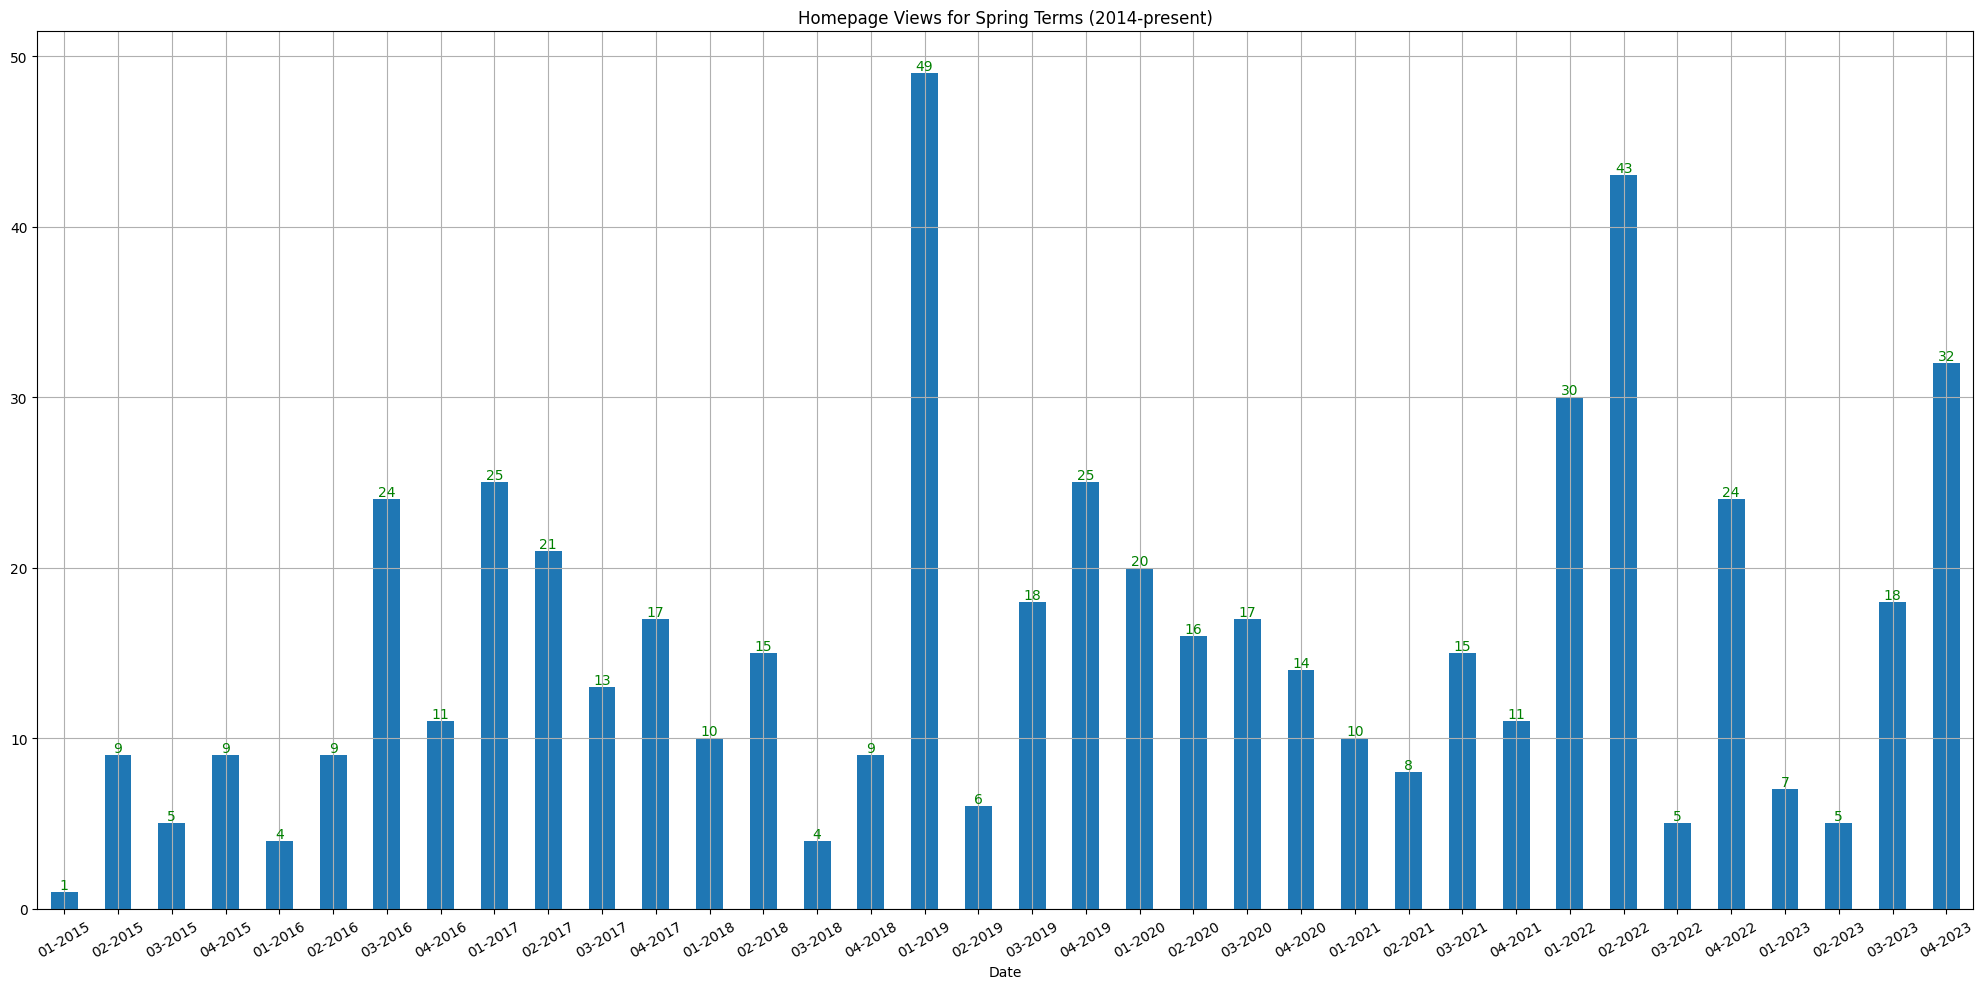

In [18]:
ax = homepage_spring_terms.plot(
        x="Formatted_Date", 
        y="Views", 
        figsize=(20,10),
        kind="bar", 
        legend=False,
        grid=True,
        rot=30,
        xlabel="Date",        
        title=f"Homepage Views for Spring Terms (2014-present)")

ax.bar_label(ax.containers[0], color="green")
plt.tight_layout()

plt.savefig("Homepage/homepage_spring.png")

plt.show()

In [19]:
homepage_summer_bymonth = homepage_summer_terms.sort_values(by="Formatted_Date")
homepage_summer_bymonth

mays = homepage_summer_bymonth.loc[ (homepage_summer_bymonth["Formatted_Date"].str.startswith("05")), ["Formatted_Date", "Views"]]
junes = homepage_summer_bymonth.loc[ (homepage_summer_bymonth["Formatted_Date"].str.startswith("06")), ["Formatted_Date", "Views"]]
julys = homepage_summer_bymonth.loc[ (homepage_summer_bymonth["Formatted_Date"].str.startswith("07")), ["Formatted_Date", "Views"]]

In [20]:
homepage_fall_bymonth = homepage_fall_terms.sort_values(by="Formatted_Date")
homepage_fall_bymonth = homepage_fall_bymonth.reset_index(drop=True)
homepage_fall_bymonth

augusts = homepage_fall_bymonth.loc[ (homepage_fall_bymonth["Formatted_Date"].str.startswith("08")), ["Formatted_Date", "Views"]]
septembers = homepage_fall_bymonth.loc[ (homepage_fall_bymonth["Formatted_Date"].str.startswith("09")), ["Formatted_Date", "Views"]]
octobers = homepage_fall_bymonth.loc[ (homepage_fall_bymonth["Formatted_Date"].str.startswith("10")), ["Formatted_Date", "Views"]]
novembers = homepage_fall_bymonth.loc[ (homepage_fall_bymonth["Formatted_Date"].str.startswith("11")), ["Formatted_Date", "Views"]]
decembers = homepage_fall_bymonth.loc[ (homepage_fall_bymonth["Formatted_Date"].str.startswith("12")), ["Formatted_Date", "Views"]]

In [21]:
homepage_spring_bymonth = homepage_spring_terms.sort_values(by="Formatted_Date")
homepage_spring_bymonth = homepage_spring_bymonth.reset_index(drop=True)
homepage_spring_bymonth

januarys = homepage_spring_bymonth.loc[ (homepage_spring_bymonth["Formatted_Date"].str.startswith("01")), ["Formatted_Date", "Views"]]
februarys = homepage_spring_bymonth.loc[ (homepage_spring_bymonth["Formatted_Date"].str.startswith("02")), ["Formatted_Date", "Views"]]
marchs = homepage_spring_bymonth.loc[ (homepage_spring_bymonth["Formatted_Date"].str.startswith("03")), ["Formatted_Date", "Views"]]
aprils = homepage_spring_bymonth.loc[ (homepage_spring_bymonth["Formatted_Date"].str.startswith("04")), ["Formatted_Date", "Views"]]

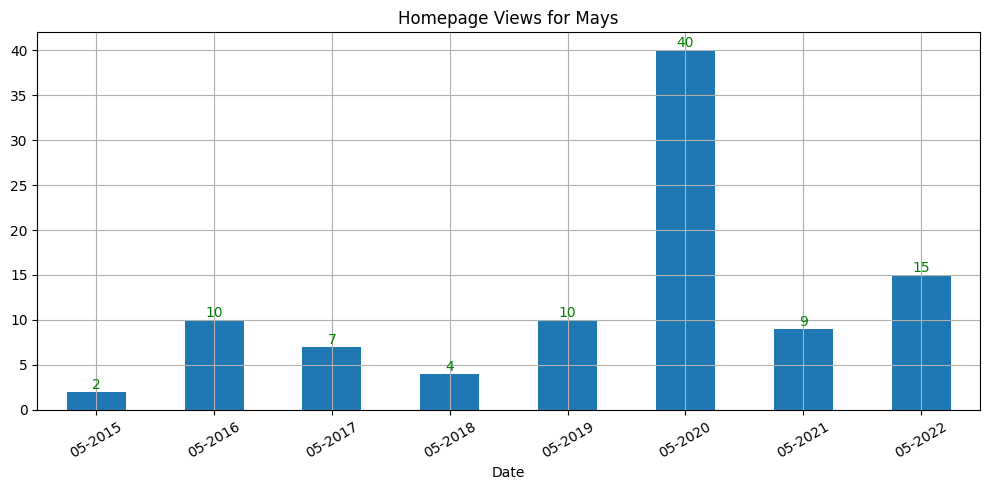

In [22]:
ax5 = mays.plot(
        x="Formatted_Date", 
        y="Views", 
        figsize=(10,5),
        kind="bar", 
        legend=False,
        grid=True,
        rot=30,
        xlabel="Date",        
        title=f"Homepage Views for Mays"        
)

ax5.bar_label(ax5.containers[0], color="green")
plt.tight_layout()

plt.savefig("Homepage/mays.png")

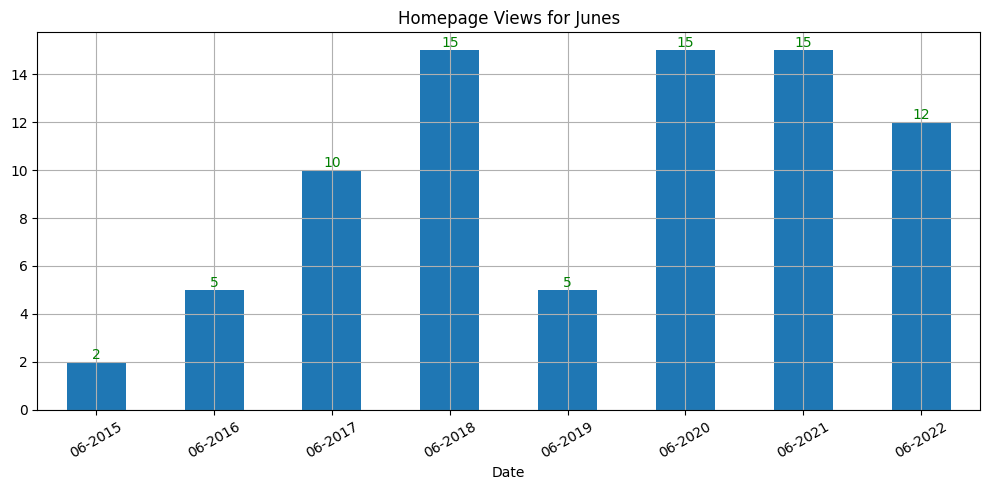

In [23]:
ax6 = junes.plot(
        x="Formatted_Date", 
        y="Views", 
        figsize=(10,5),
        kind="bar", 
        legend=False,
        grid=True,
        rot=30,
        xlabel="Date",        
        title=f"Homepage Views for Junes")

ax6.bar_label(ax6.containers[0], color="green")
plt.tight_layout()

plt.savefig("Homepage/junes.png")

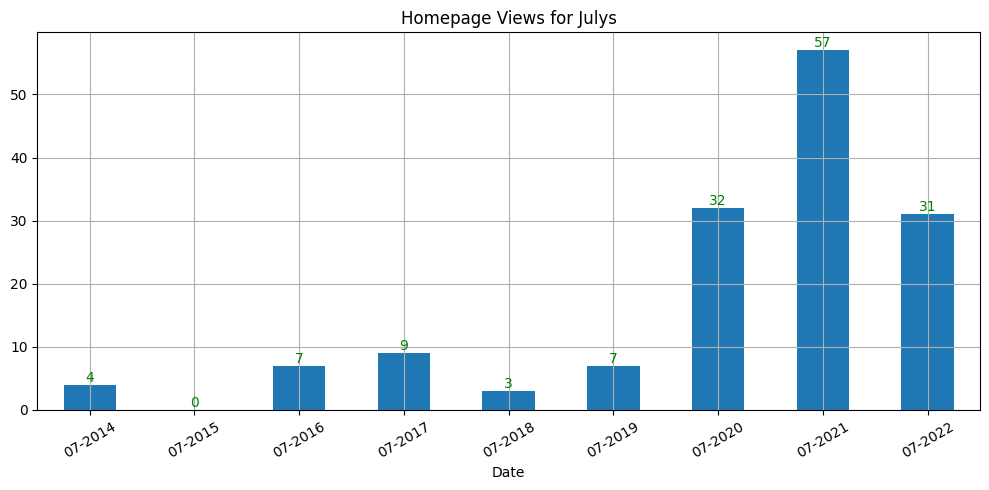

In [24]:
ax7 = julys.plot(
        x="Formatted_Date", 
        y="Views", 
        figsize=(10,5),
        kind="bar", 
        legend=False,
        grid=True,
        rot=30,
        xlabel="Date",        
        title=f"Homepage Views for Julys")

ax7.bar_label(ax7.containers[0], color="green")
plt.tight_layout()

plt.savefig("Homepage/julys.png")

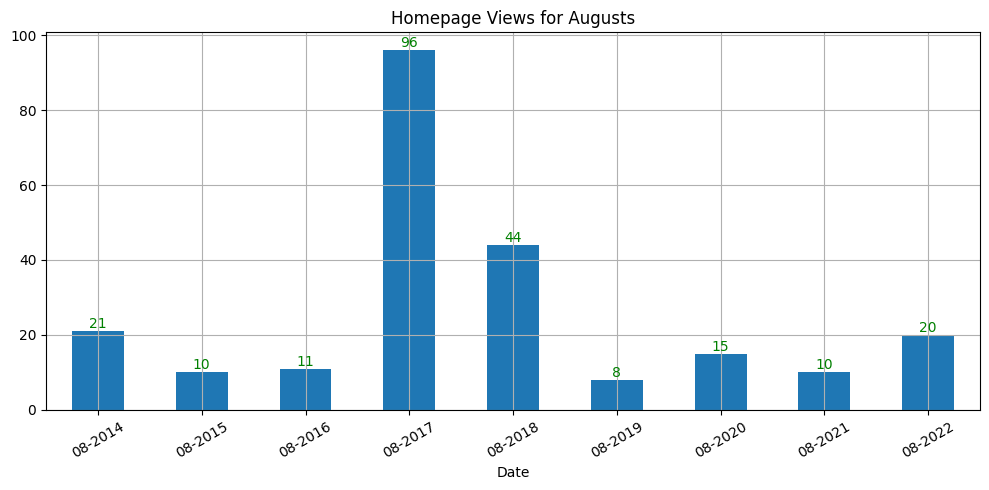

In [25]:
ax8 = augusts.plot(
        x="Formatted_Date", 
        y="Views", 
        figsize=(10,5),
        kind="bar", 
        legend=False,
        grid=True,
        rot=30,
        xlabel="Date",        
        title=f"Homepage Views for Augusts"        
)

ax8.bar_label(ax8.containers[0], color="green")
plt.tight_layout()

plt.savefig("Homepage/augusts.png")

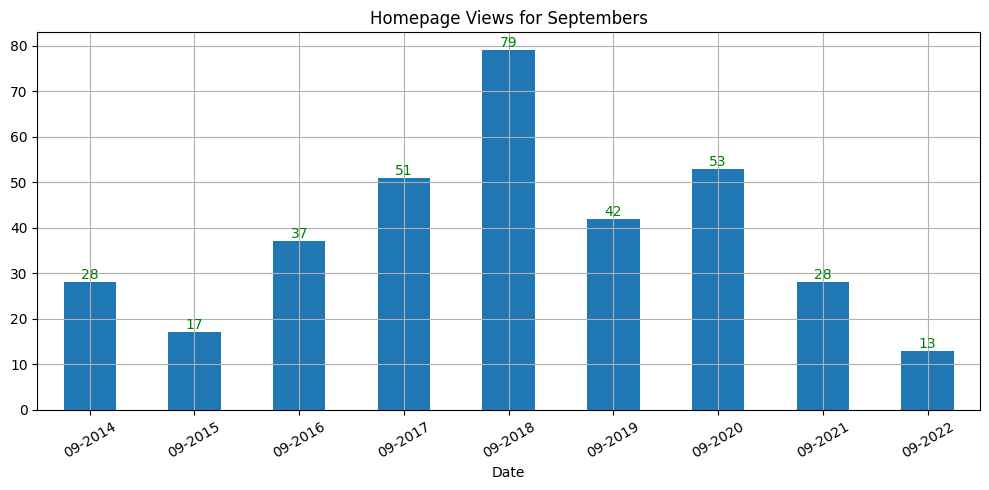

In [26]:
ax9 = septembers.plot(
        x="Formatted_Date", 
        y="Views", 
        figsize=(10,5),
        kind="bar", 
        legend=False,
        grid=True,
        rot=30,
        xlabel="Date",        
        title=f"Homepage Views for Septembers"        
)

ax9.bar_label(ax9.containers[0], color="green")
plt.tight_layout()

plt.savefig("Homepage/septembers.png")

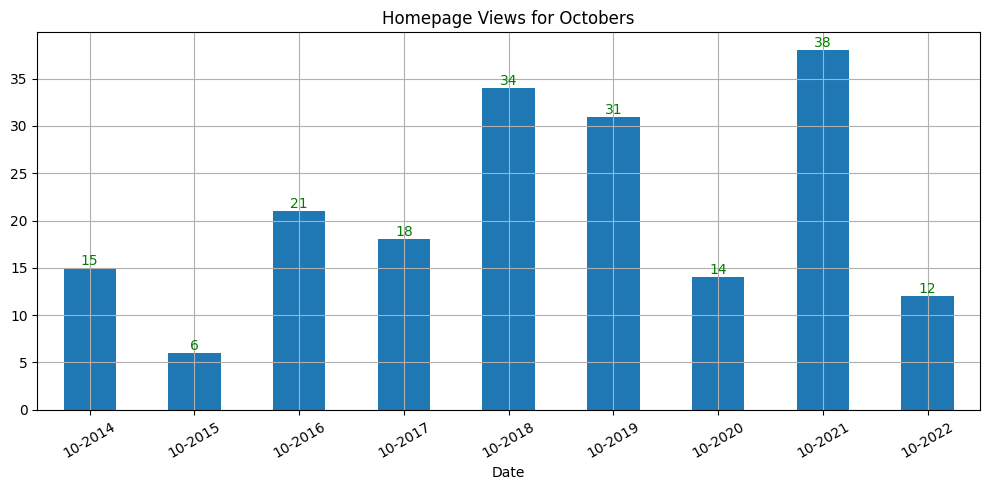

In [27]:
ax10 = octobers.plot(
        x="Formatted_Date", 
        y="Views", 
        figsize=(10,5),
        kind="bar", 
        legend=False,
        grid=True,
        rot=30,
        xlabel="Date",        
        title=f"Homepage Views for Octobers"        
)

ax10.bar_label(ax10.containers[0], color="green")
plt.tight_layout()

plt.savefig("Homepage/octobers.png")

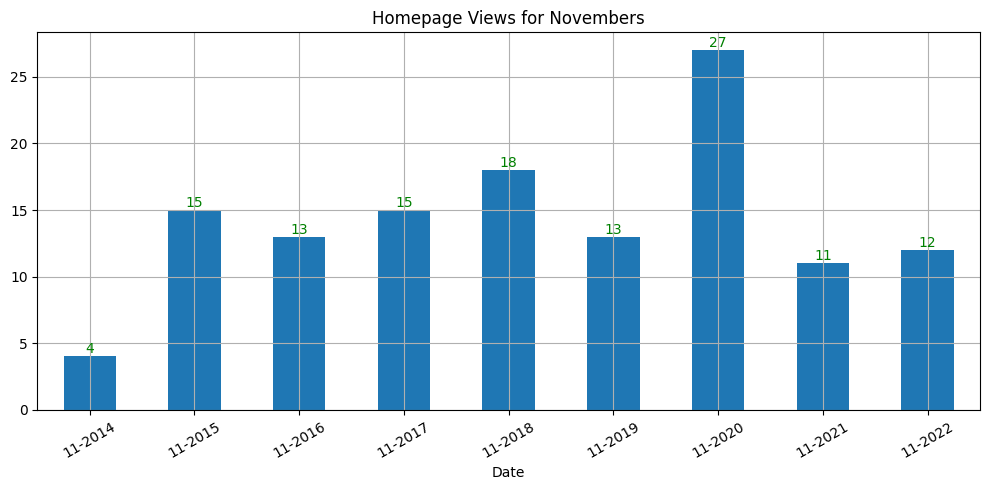

In [28]:
ax11 = novembers.plot(
        x="Formatted_Date", 
        y="Views", 
        figsize=(10,5),
        kind="bar", 
        legend=False,
        grid=True,
        rot=30,
        xlabel="Date",        
        title=f"Homepage Views for Novembers"        
)

ax11.bar_label(ax11.containers[0], color="green")
plt.tight_layout()

plt.savefig("Homepage/novembers.png")

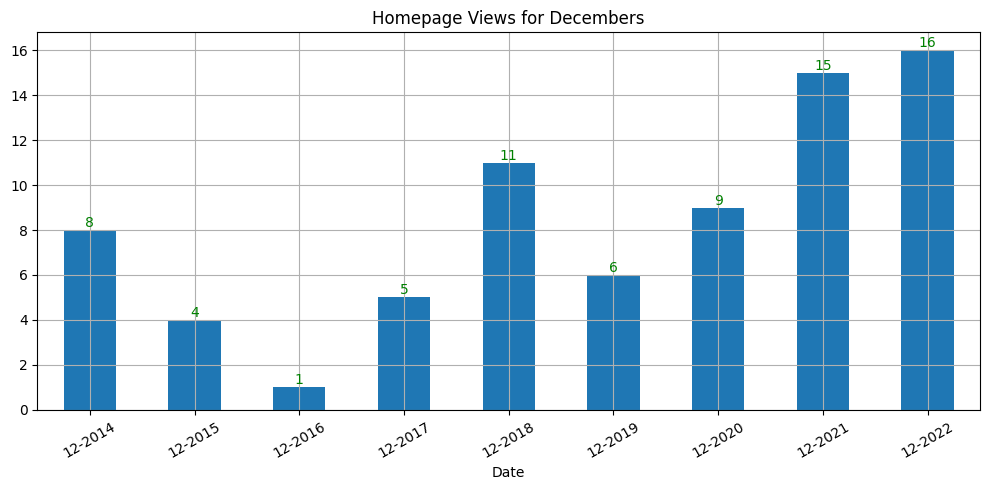

In [29]:
ax12 = decembers.plot(
        x="Formatted_Date", 
        y="Views", 
        figsize=(10,5),
        kind="bar", 
        legend=False,
        grid=True,
        rot=30,
        xlabel="Date",        
        title=f"Homepage Views for Decembers"        
)

ax12.bar_label(ax12.containers[0], color="green")
plt.tight_layout()

plt.savefig("Homepage/decembers.png")

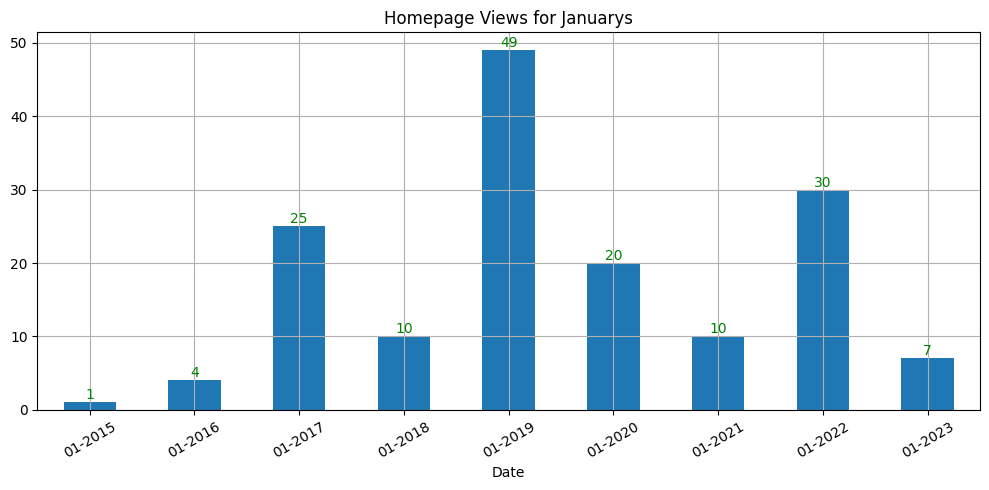

In [30]:
ax1 = januarys.plot(
        x="Formatted_Date", 
        y="Views", 
        figsize=(10,5),
        kind="bar", 
        legend=False,
        grid=True,
        rot=30,
        xlabel="Date",        
        title=f"Homepage Views for Januarys"        
)

ax1.bar_label(ax1.containers[0], color="green")
plt.tight_layout()

plt.savefig("Homepage/januarys.png")

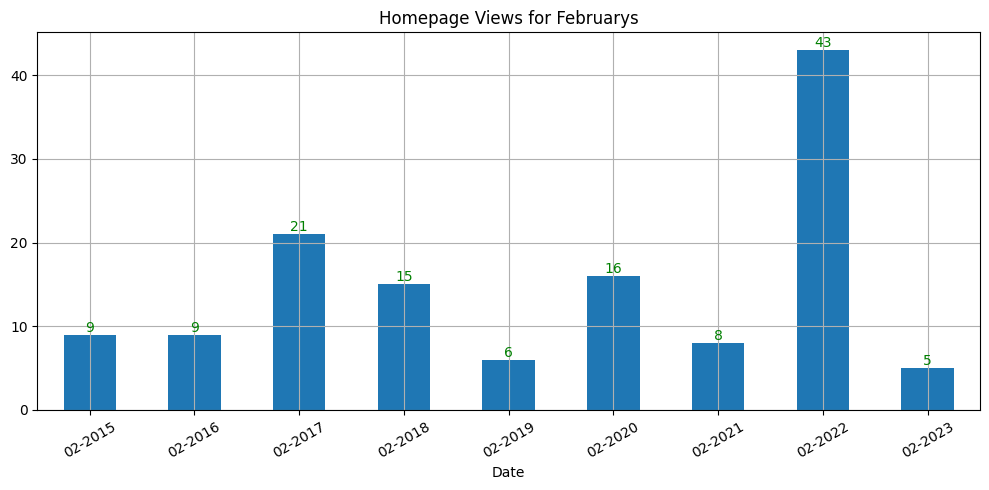

In [31]:
ax2 = februarys.plot(
        x="Formatted_Date", 
        y="Views", 
        figsize=(10,5),
        kind="bar", 
        legend=False,
        grid=True,
        rot=30,
        xlabel="Date",        
        title=f"Homepage Views for Februarys"        
)

ax2.bar_label(ax2.containers[0], color="green")
plt.tight_layout()

plt.savefig("Homepage/februarys.png")

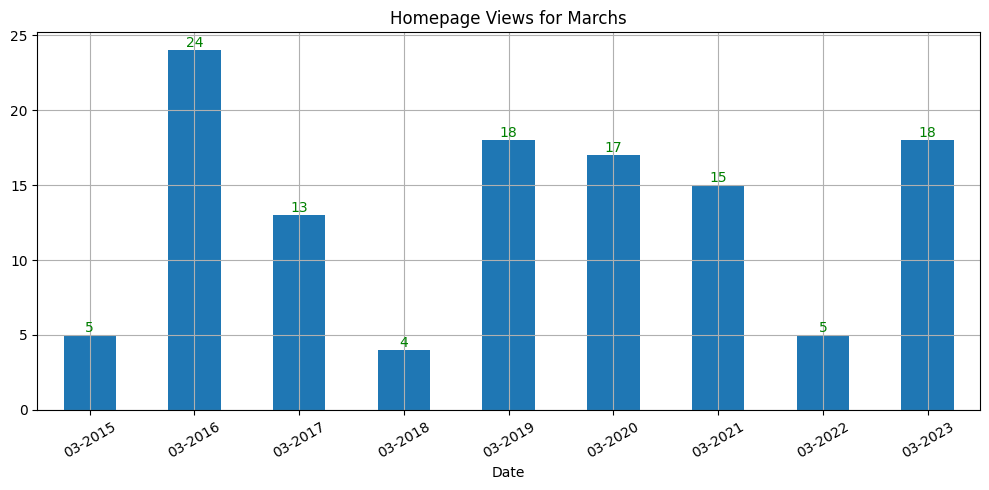

In [32]:
ax3= marchs.plot(
        x="Formatted_Date", 
        y="Views", 
        figsize=(10,5),
        kind="bar", 
        legend=False,
        grid=True,
        rot=30,
        xlabel="Date",        
        title=f"Homepage Views for Marchs"        
)

ax3.bar_label(ax3.containers[0], color="green")
plt.tight_layout()

plt.savefig("Homepage/marchs.png")

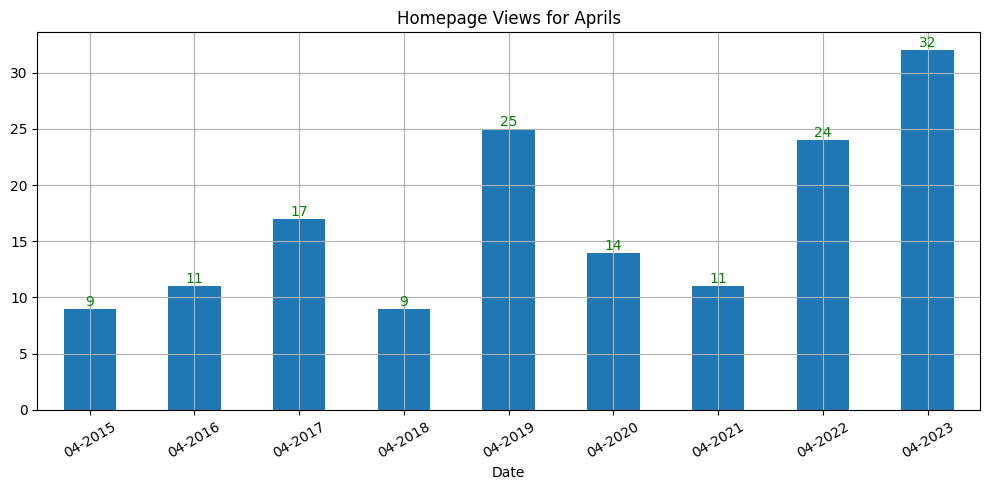

In [33]:
ax4 = aprils.plot(
        x="Formatted_Date", 
        y="Views", 
        figsize=(10,5),
        kind="bar", 
        legend=False,
        grid=True,
        rot=30,
        xlabel="Date",        
        title=f"Homepage Views for Aprils"        
)

ax4.bar_label(ax4.containers[0], color="green")
plt.tight_layout()

plt.savefig("Homepage/aprils.png")

# Inferences

In [34]:
homepage_summer_bymonth["Month"] = homepage_summer_bymonth["Formatted_Date"].apply(lambda x: x[:2])
homepage_summer_bymonth = homepage_summer_bymonth.reset_index(drop=True)

homepage_summer_bymonth

,Date,Views,Formatted_Date,Month
0,2015-05-01,2,05-2015,05
1,2016-05-01,10,05-2016,05
2,2017-05-01,7,05-2017,05
3,2018-05-01,4,05-2018,05
4,2019-05-01,10,05-2019,05
5,2020-05-01,40,05-2020,05
6,2021-05-01,9,05-2021,05
7,2022-05-01,15,05-2022,05
8,2015-06-01,2,06-2015,06
9,2016-06-01,5,06-2016,06


In [35]:
maxs = homepage_summer_bymonth.groupby(["Month"])["Views"].max()
maxs.name = "Max"
maxs

Month
05    40
06    15
07    57
Name: Max, dtype: int64

In [36]:
mins = homepage_summer_bymonth.groupby(["Month"])["Views"].min()
mins.name = "Min"
mins

Month
05    2
06    2
07    0
Name: Min, dtype: int64

In [37]:
last = homepage_summer_bymonth.loc[ (homepage_summer_bymonth["Formatted_Date"].str.endswith("2022"))   , "Views"]

last.name = "Last"
last.index = mins.index

last

# last.iloc[-1]

Month
05    15
06    12
07    31
Name: Last, dtype: int64

In [38]:
summer_df = pd.concat([maxs, mins, last], axis=1)
summer_df

,Max,Min,Last
Month,,,
05,40,2,15
06,15,2,12
07,57,0,31


In [39]:
summer_df["Max_to_Last_%Change"] = round((summer_df["Last"] - summer_df["Max"]) / summer_df["Max"] * 100, 2)
summer_df

,Max,Min,Last,Max_to_Last_%Change
Month,,,,
05,40,2,15,-62.50
06,15,2,12,-20.00
07,57,0,31,-45.61


In [40]:
summer_df["Max_to_Min_%Change"] = round((summer_df["Min"] - summer_df["Max"]) / summer_df["Max"] * 100, 2)
summer_df

,Max,Min,Last,Max_to_Last_%Change,Max_to_Min_%Change
Month,,,,,
05,40,2,15,-62.50,-95.00
06,15,2,12,-20.00,-86.67
07,57,0,31,-45.61,-100.00


In [41]:
homepage_fall_bymonth["Month"] = homepage_fall_bymonth["Formatted_Date"].apply(lambda x: x[:2])

homepage_fall_bymonth

,Date,Views,Formatted_Date,Month
0,2014-08-01,21,08-2014,08
1,2015-08-01,10,08-2015,08
2,2016-08-01,11,08-2016,08
3,2017-08-01,96,08-2017,08
4,2018-08-01,44,08-2018,08
5,2019-08-01,8,08-2019,08
6,2020-08-01,15,08-2020,08
7,2021-08-01,10,08-2021,08
8,2022-08-01,20,08-2022,08
9,2014-09-01,28,09-2014,09


In [42]:
maxs = homepage_fall_bymonth.groupby(["Month"])["Views"].max()
maxs.name = "Max"
maxs

Month
08    96
09    79
10    38
11    27
12    16
Name: Max, dtype: int64

In [43]:
mins = homepage_fall_bymonth.groupby(["Month"])["Views"].min()
mins.name = "Min"
mins

Month
08     8
09    13
10     6
11     4
12     1
Name: Min, dtype: int64

In [44]:
last = homepage_fall_bymonth.loc[ (homepage_fall_bymonth["Formatted_Date"].str.endswith("2022"))   , "Views"]

last.name = "Last"
last.index = mins.index

last

# last.iloc[-1]

Month
08    20
09    13
10    12
11    12
12    16
Name: Last, dtype: int64

In [45]:
fall_df = pd.concat([maxs, mins, last], axis=1)
fall_df

,Max,Min,Last
Month,,,
08,96,8,20
09,79,13,13
10,38,6,12
11,27,4,12
12,16,1,16


In [46]:
fall_df["Max_to_Last_%Change"] = round((fall_df["Last"] - fall_df["Max"]) / fall_df["Max"] * 100, 2)
fall_df

,Max,Min,Last,Max_to_Last_%Change
Month,,,,
08,96,8,20,-79.17
09,79,13,13,-83.54
10,38,6,12,-68.42
11,27,4,12,-55.56
12,16,1,16,0.00


In [47]:
fall_df["Max_to_Min_%Change"] = round((fall_df["Min"] - fall_df["Max"]) / fall_df["Max"] * 100, 2)
fall_df

,Max,Min,Last,Max_to_Last_%Change,Max_to_Min_%Change
Month,,,,,
08,96,8,20,-79.17,-91.67
09,79,13,13,-83.54,-83.54
10,38,6,12,-68.42,-84.21
11,27,4,12,-55.56,-85.19
12,16,1,16,0.00,-93.75


In [48]:
homepage_spring_bymonth["Month"] = homepage_spring_bymonth["Formatted_Date"].apply(lambda x: x[:2])

homepage_spring_bymonth

,Date,Views,Formatted_Date,Month
0,2015-01-01,1,01-2015,01
1,2016-01-01,4,01-2016,01
2,2017-01-01,25,01-2017,01
3,2018-01-01,10,01-2018,01
4,2019-01-01,49,01-2019,01
5,2020-01-01,20,01-2020,01
6,2021-01-01,10,01-2021,01
7,2022-01-01,30,01-2022,01
8,2023-01-01,7,01-2023,01
9,2015-02-01,9,02-2015,02


In [49]:
maxs = homepage_spring_bymonth.groupby(["Month"])["Views"].max()
maxs.name = "Max"
maxs

Month
01    49
02    43
03    24
04    32
Name: Max, dtype: int64

In [50]:
mins = homepage_spring_bymonth.groupby(["Month"])["Views"].min()
mins.name = "Min"
mins

Month
01    1
02    5
03    4
04    9
Name: Min, dtype: int64

In [51]:
last = homepage_spring_bymonth.loc[ (homepage_spring_bymonth["Formatted_Date"].str.endswith("2022"))   , "Views"]

last.name = "Last"
last.index = mins.index

last

# last.iloc[-1]

Month
01    30
02    43
03     5
04    24
Name: Last, dtype: int64

In [52]:
spring_df = pd.concat([maxs, mins, last], axis=1)
spring_df

,Max,Min,Last
Month,,,
01,49,1,30
02,43,5,43
03,24,4,5
04,32,9,24


In [53]:
spring_df["Max_to_Last_%Change"] = round((spring_df["Last"] - spring_df["Max"]) / spring_df["Max"] * 100, 2)
spring_df

,Max,Min,Last,Max_to_Last_%Change
Month,,,,
01,49,1,30,-38.78
02,43,5,43,0.00
03,24,4,5,-79.17
04,32,9,24,-25.00


In [54]:
spring_df["Max_to_Min_%Change"] = round((spring_df["Min"] - spring_df["Max"]) / spring_df["Max"] * 100, 2)
spring_df

,Max,Min,Last,Max_to_Last_%Change,Max_to_Min_%Change
Month,,,,,
01,49,1,30,-38.78,-97.96
02,43,5,43,0.00,-88.37
03,24,4,5,-79.17,-83.33
04,32,9,24,-25.00,-71.88


In [55]:
year_df = pd.concat([spring_df, summer_df, fall_df], axis=0)
year_df

,Max,Min,Last,Max_to_Last_%Change,Max_to_Min_%Change
Month,,,,,
01,49,1,30,-38.78,-97.96
02,43,5,43,0.00,-88.37
03,24,4,5,-79.17,-83.33
04,32,9,24,-25.00,-71.88
05,40,2,15,-62.50,-95.00
06,15,2,12,-20.00,-86.67
07,57,0,31,-45.61,-100.00
08,96,8,20,-79.17,-91.67
09,79,13,13,-83.54,-83.54


In [56]:
year_df.describe()

,Max,Min,Last,Max_to_Last_%Change,Max_to_Min_%Change
count,12.000000,12.000000,12.000000,12.000000,12.000000
mean,43.000000,4.583333,19.416667,-46.479167,-88.464167
std,24.535688,3.872005,10.740394,29.961452,7.756924
min,15.000000,0.000000,5.000000,-83.540000,-100.000000
25%,26.250000,1.750000,12.000000,-71.107500,-94.062500
50%,39.000000,4.000000,15.500000,-50.585000,-87.520000
75%,51.000000,6.500000,25.500000,-23.750000,-84.042500
max,96.000000,13.000000,43.000000,0.000000,-71.880000


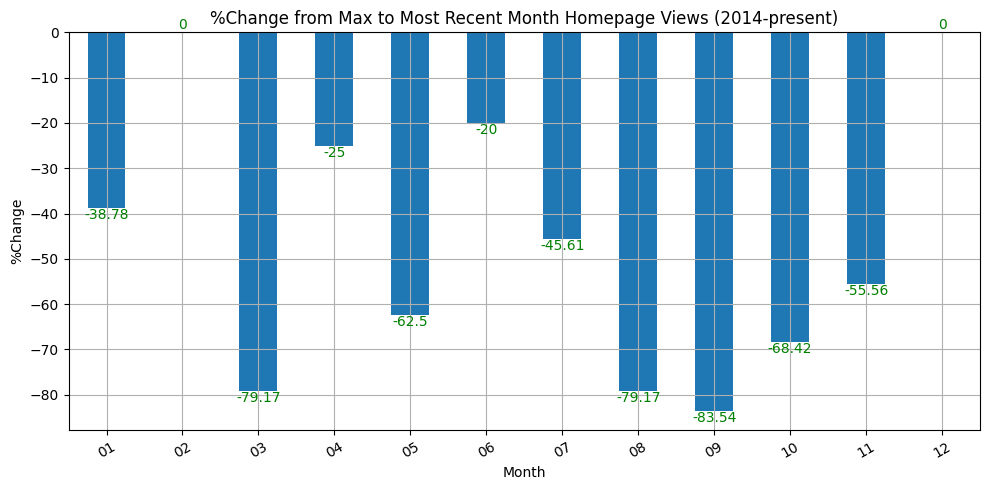

In [57]:
ax12_1 = year_df.plot(
        y="Max_to_Last_%Change", 
        figsize=(10,5),
        kind="bar", 
        legend=False,
        grid=True,
        rot=30,
        xlabel="Month", 
        ylabel="%Change",
        title=f"%Change from Max to Most Recent Month Homepage Views (2014-present)"        
)

ax12_1.bar_label(ax12_1.containers[0], color="green")
plt.tight_layout()

plt.savefig("Homepage/homepage_max_to_most_recent.png")

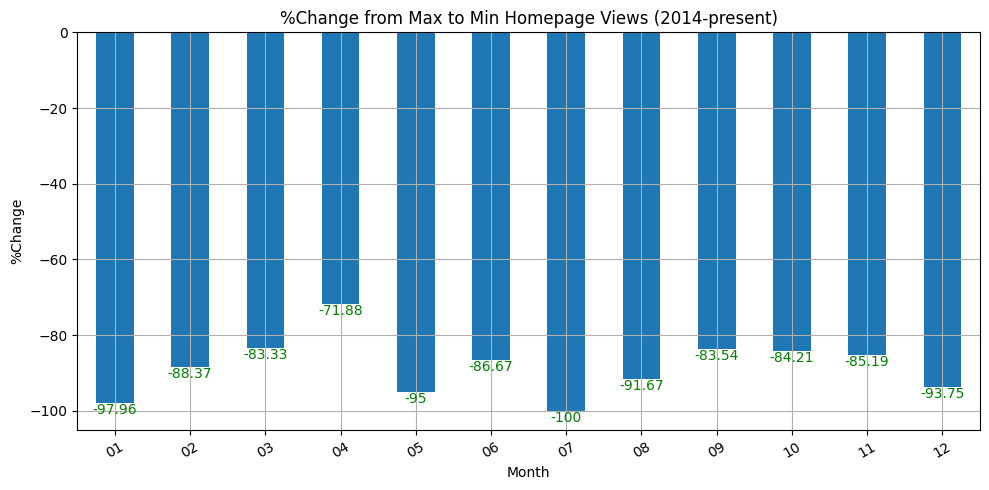

In [58]:
ax12_2 = year_df.plot(
        y="Max_to_Min_%Change", 
        figsize=(10,5),
        kind="bar", 
        legend=False,
        grid=True,
        rot=30,
        xlabel="Month", 
        ylabel="%Change",
        title=f"%Change from Max to Min Homepage Views (2014-present)"        
)

ax12_2.bar_label(ax12_2.containers[0], color="green")
plt.tight_layout()

plt.savefig("Homepage/homepage_max_to_min.png")

In [59]:
print(f'Mean of homepage: {homepage_df_alltime["Views"].mean()}') 
print(f'Median of homepage: {homepage_df_alltime["Views"].median()}') 
print(f'Mode of homepage: {st.mode(homepage_df_alltime["Views"], axis=None, keepdims=False)}') 

print(f'Min of homepage: {homepage_df_alltime["Views"].min()}') 
print(f'Max of homepage: {homepage_df_alltime["Views"].max()}') 

Mean of homepage: 17.547169811320753
Median of homepage: 13.0
Mode of homepage: ModeResult(mode=15, count=11)
Min of homepage: 0
Max of homepage: 96
